In [ ]:
!git clone https://github.com/sumiya-kuroda/EMsegmentation-mito.git

Cloning into 'EMsegmentation-mito'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 305 (delta 30), reused 58 (delta 18), pack-reused 230
Receiving objects: 100% (305/305), 98.13 MiB | 15.50 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [ ]:
import os
import numpy as np
import cv2
import torchvision.models.segmentation
import torch
import torchvision.transforms as tf
Learning_Rate=1e-5
width=height=800 # image width and height
batchSize=3

In [ ]:
TrainFolder="/content/EMsegmentation-mito/dataset/SNEMI3D_mito/train/"
ListImages=os.listdir(os.path.join(TrainFolder, "images")) 

In [ ]:
transformImg=tf.Compose([tf.ToPILImage(),tf.Resize((height,width)), tf.ToTensor(),tf.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
transformAnn=tf.Compose([tf.ToPILImage(),tf.Resize((height,width)), tf.ToTensor()])

In [ ]:
idx = np.random.randint(0,len(ListImages)) # Pick random image
Img = cv2.imread(os.path.join(TrainFolder, "images",ListImages[idx]))

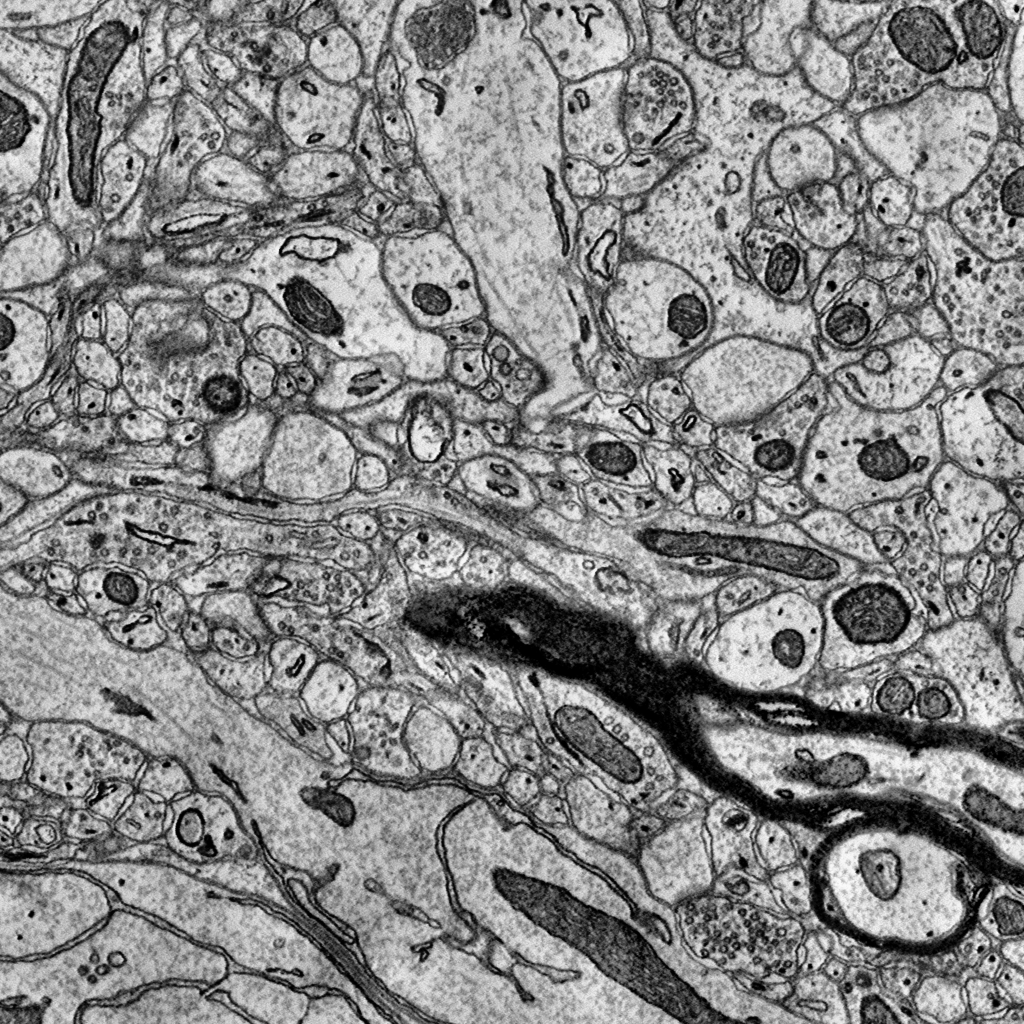

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(Img)

In [ ]:
Ann =  cv2.imread(os.path.join(TrainFolder,   "labels", ListImages[idx]),0)       

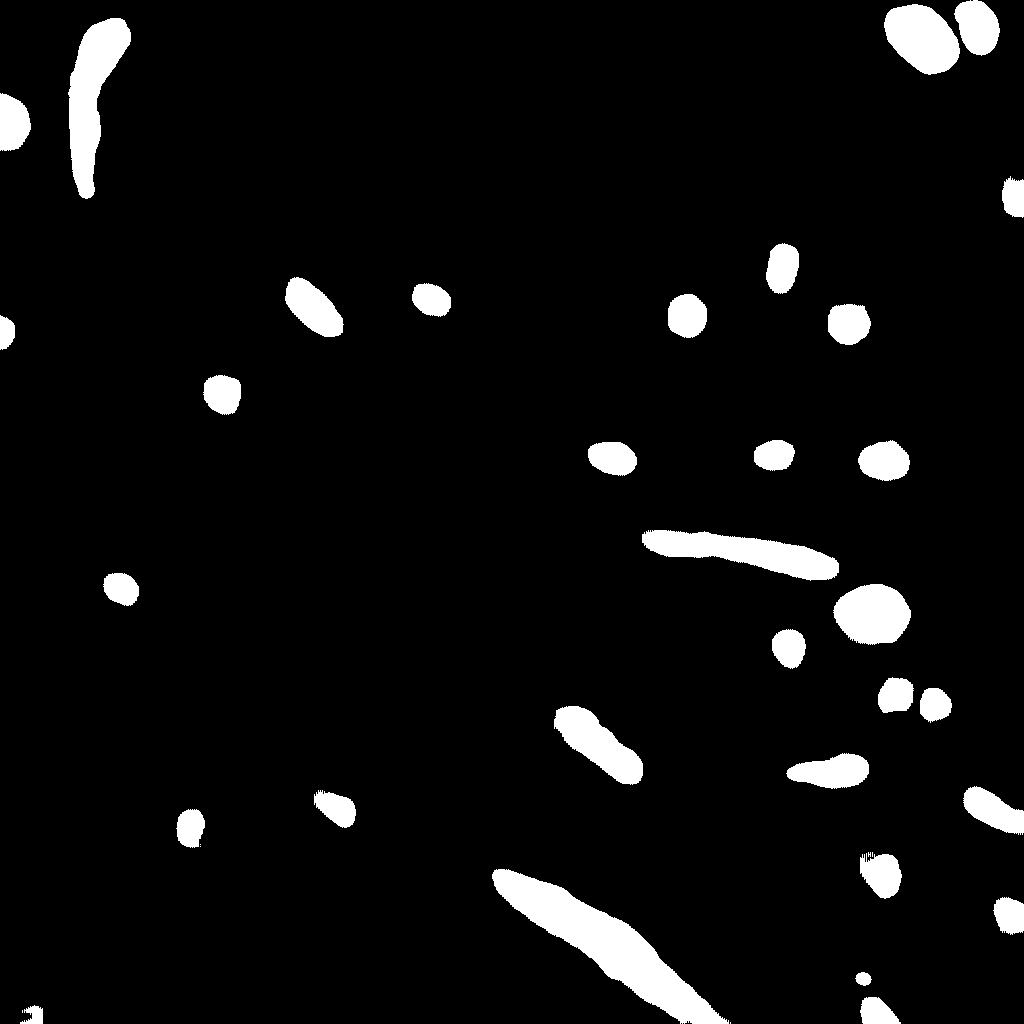

In [ ]:
cv2_imshow(Ann)

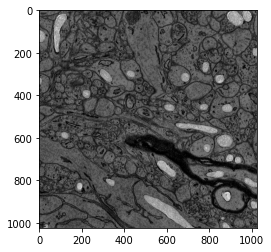

In [ ]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
ax.imshow(Img, cmap='gray')
ax.imshow(Ann, cmap='gray', alpha=0.5)
plt.show()
#plt.imsave('overlapped.png')

In [ ]:
Img

array([[[178, 178, 178],
        [199, 199, 199],
        [179, 179, 179],
        ...,
        [185, 185, 185],
        [187, 187, 187],
        [212, 212, 212]],

       [[183, 183, 183],
        [191, 191, 191],
        [177, 177, 177],
        ...,
        [195, 195, 195],
        [196, 196, 196],
        [228, 228, 228]],

       [[190, 190, 190],
        [177, 177, 177],
        [169, 169, 169],
        ...,
        [194, 194, 194],
        [172, 172, 172],
        [207, 207, 207]],

       ...,

       [[ 96,  96,  96],
        [ 95,  95,  95],
        [ 82,  82,  82],
        ...,
        [151, 151, 151],
        [153, 153, 153],
        [166, 166, 166]],

       [[ 77,  77,  77],
        [ 67,  67,  67],
        [ 56,  56,  56],
        ...,
        [147, 147, 147],
        [175, 175, 175],
        [197, 197, 197]],

       [[ 69,  69,  69],
        [ 60,  60,  60],
        [ 88,  88,  88],
        ...,
        [162, 162, 162],
        [192, 192, 192],
        [207, 207, 207]]

In [ ]:
import numpy as np
np.unique(Ann)

array([  0, 255], dtype=uint8)

In [ ]:
Img[Ann==255] = [0,255,0]

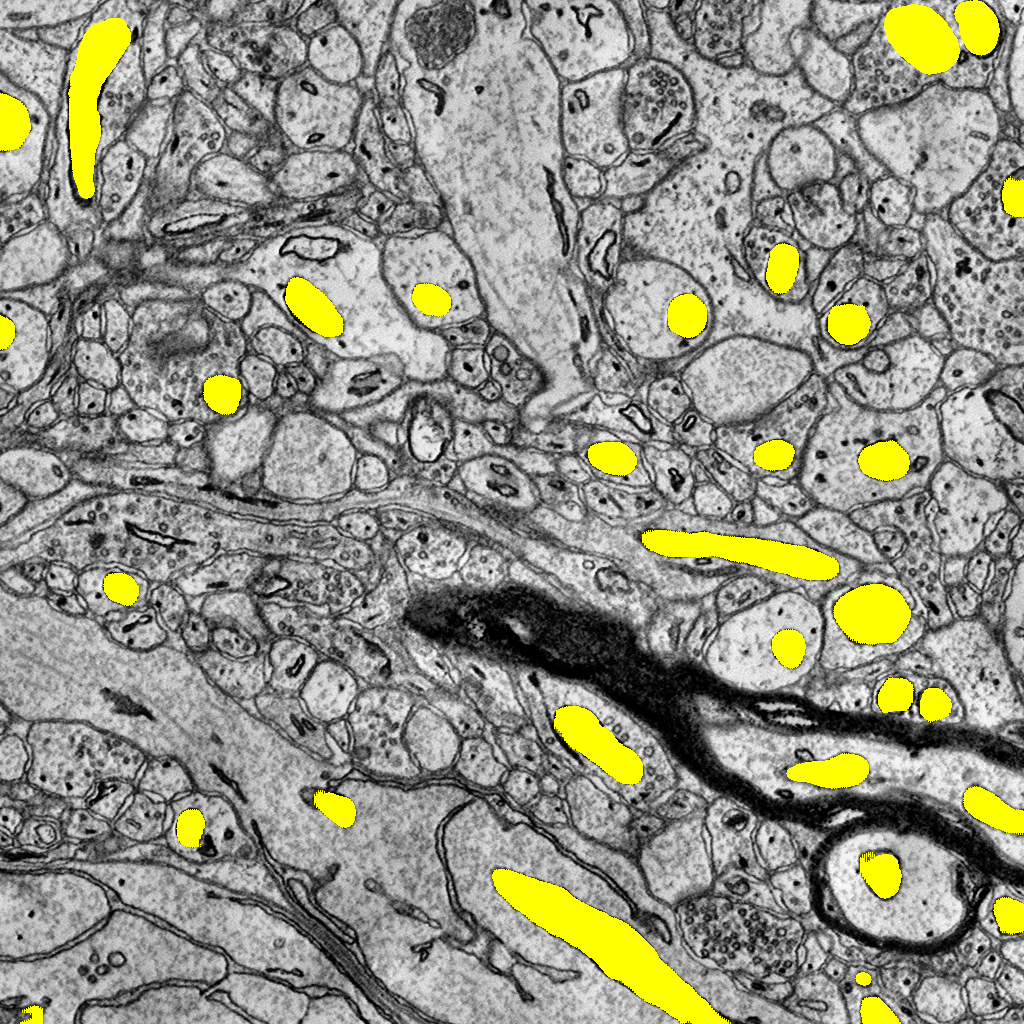

In [ ]:
cv2_imshow(Img)

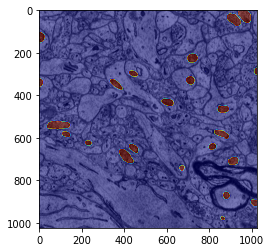

In [ ]:
fig, ax = plt.subplots()
ax.imshow(Img,cmap='gray')
ax.imshow(Ann,cmap='jet', alpha=0.5)
fig.show()
fig.savefig('overlapped.png')